In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
fname = 'R15.txt'
data = np.loadtxt(fname)
label = data[:, 2:3]
data = data[:, :2]

In [29]:
idx = list(range(data.shape[0]))
random.shuffle(idx)
train_percent = 0.7
train_idx = idx[:int(train_percent * len(idx))]
test_idx = idx[int(train_percent * len(idx)):]
train_data = data[train_idx, :]
train_label = label[train_idx, :]
test_data = data[test_idx, :]
test_label = label[test_idx, :]

print(train_data.shape)
print(train_label.shape)
print('------------')
print(test_data.shape)
print(test_label.shape)

(420, 2)
(420, 1)
------------
(180, 2)
(180, 1)


In [40]:
def error(label, true_label):
    s = 0
    for x, y in zip(label, true_label):
        if x[0] != y[0]:
            s += 1
    return s / true_label.shape[0]

In [31]:
def naive_bayes(train_data, train_label):
    total_c = np.int32(np.max(train_label))
    n = train_label.shape[0]
    py = []
    norm_arg = []
    for i in range(total_c):
        idx = np.where(train_label == i+1)
        py.append(len(idx[0]) / n)
        temp = train_data[idx]
        norm_arg.append((np.mean(temp), np.std(temp)))
    return (py, norm_arg)

In [76]:
def predict(test_data, py, norm_arg):
    m, n = test_data.shape
    pred_y = []
    for d in test_data:
        temp_y = []
        for i in range(len(py)):
            mu, sigma = norm_arg[i]
            y = np.log(py[i]) + n * np.log(1 / (np.sqrt(2 * np.pi * sigma ** 2) )) - np.sum((d-mu)**2 / (2 * sigma ** 2))
            temp_y.append(y)
        pred_y.append([np.argmax(temp_y)+1])
    return np.array(pred_y)

In [77]:
py, norm_arg = naive_bayes(train_data, train_label)

In [104]:
pre_label = predict(test_data, py, norm_arg)
print(error(pre_label, test_label))
# print(pre_label)

0.8666666666666667


In [101]:
def plot_data(data, label):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in label:
        idx = np.argwhere(label == i)
#         print(idx)
#         print('---------------')
        temp_d = data[idx[:, 0], :]
        ax.scatter(temp_d[:, 0], temp_d[:, 1], marker='o', cmap=plt.cm.jet(i))
    plt.show()

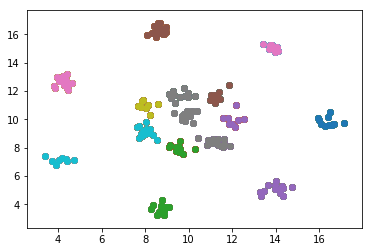

In [102]:
plot_data(test_data, test_label)

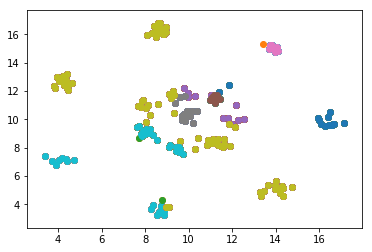

In [103]:
plot_data(test_data, pre_label)